In [1]:
import numpy as np

In [2]:
train_data = np.load("train_data_encode.npy")
train_labels = np.load("train_labels.npy")
test_data = np.load("test_data_encode.npy")
test_labels = np.load("test_labels.npy")

In [3]:
train_data_rs = train_data.reshape(train_data.shape[0], train_data.shape[1] * train_data.shape[2])
test_data_rs = test_data.reshape(test_data.shape[0], test_data.shape[1] * test_data.shape[2])

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [5]:
scaler = StandardScaler()
train_data_scale = scaler.fit_transform(train_data_rs)
test_data_scale = scaler.transform(test_data_rs)

In [6]:
svm_model = SVC(C=1, kernel='rbf', gamma=0.001, probability=True)

In [7]:
svm_model.fit(train_data_scale, train_labels)

SVC(C=1, gamma=0.001, probability=True)

In [8]:
p = svm_model.predict_proba(test_data_scale)[:,1]

In [9]:
import sklearn.metrics as mt
import matplotlib.pyplot as plt
import numpy as np

def draw_roc(preds):
    for i in range(len(preds)):
        fpr, tpr, _ = mt.roc_curve(test_labels,  preds[i])
        auc = mt.roc_auc_score(test_labels, preds[i])
        plt.plot(fpr,tpr,label="auc={}".format(str(auc)))
        gmeans = np.sqrt(tpr * (1-fpr))
        ix = np.argmax(gmeans)
        print('Best Threshold_%d=%f, G-Mean=%.3f' % (i, _[ix], gmeans[ix]))
    plt.legend(loc=4)
    plt.xlabel("1 - Specificity")
    plt.ylabel("Sensitivity")
    plt.show()

Best Threshold_0=0.418868, G-Mean=0.632


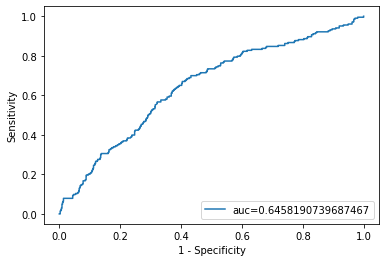

In [10]:
draw_roc([p])

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef, confusion_matrix, accuracy_score

In [12]:
def evaluate(pred):
    print("Confusion matrix\n", confusion_matrix(pred, test_labels))
    print("MCC: ", matthews_corrcoef(pred, test_labels))
    tn, fp, fn, tp = confusion_matrix(pred, test_labels).ravel()
    tpr = tp/(tp + fn)
    print("Recall/Sensitivity: ", tpr)
    tnr = tn/(tn + fp)
    print("Specificity: ", tnr)
    print("Accuracy: ", accuracy_score(pred, test_labels))
    print("\n")

In [13]:
p_=svm_model.predict(test_data_scale)

In [14]:
evaluate(p_)

Confusion matrix
 [[700  93]
 [322 110]]
MCC:  0.17649996118888134
Recall/Sensitivity:  0.25462962962962965
Specificity:  0.8827238335435057
Accuracy:  0.6612244897959184


